<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bayesian-Analysis" data-toc-modified-id="Bayesian-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bayesian Analysis</a></span><ul class="toc-item"><li><span><a href="#Application-of-Bayes'-Theorem" data-toc-modified-id="Application-of-Bayes'-Theorem-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Application of Bayes' Theorem</a></span></li><li><span><a href="#Bayesian-Analysis" data-toc-modified-id="Bayesian-Analysis-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Bayesian Analysis</a></span></li></ul></li></ul></div>

# Bayesian Analysis

## Application of Bayes' Theorem

Suppose we have 3 jars with 100 marbles in each.

- Jar 1 has 40 blue marbles, 30 red marbles, and 30 green marbles.
- Jar 2 has 60 blue marbles, 20 red marbles, and 20 green marbles.
- Jar 3 has 10 blue marbles, 30 red marbles, and 60 green marbles.

You pick a marble from one of the jars at random, and the marble is green. What are the probabilities that the marble came from each of the three jars?

we would need to know what our prior probabilities were and our likelihoods

In [2]:
import numpy as np
import scipy.stats as stats
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
priors = [1/3, 1/3, 1/3]

The likelihoods in this case would just be the percentages of green marbles in each jar.

In [4]:
likelihoods = [0.3, 0.2, 0.6]

In [5]:
marg = sum(np.multiply(priors, likelihoods))
post = np.divide(np.multiply(priors, likelihoods), marg)
print(np.multiply(priors, likelihoods))
print(marg)
print(post)

[0.1        0.06666667 0.2       ]
0.36666666666666664
[0.27272727 0.18181818 0.54545455]


We can define a function in Python that accepts a list of priors and corresponding likelihoods. Our function will compute the marginal (marg) and then use Bayes' Theorem to calculate the posterior probabilities for the each of the hypotheses (post).m

In [6]:
def bayes_rule(priors, likelihoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

bayes_rule(priors, likelihoods)

array([0.27272727, 0.18181818, 0.54545455])

From these results, we can see that there is a 25% chance that the green marble we drew came from Jar 1, a 16.67% chance that it came from Jar 2, and a 58.3% chance that it came from Jar 3.

Suppose you had picked a blue marble instead of a green one. We would just need to update our likelihoods to account for the proportion of each jar whose marbles were blue.

In [7]:
likelihoods = [0.4, 0.6, 0.1]

bayes_rule(priors, likelihoods)

array([0.36363636, 0.54545455, 0.09090909])

There's a 36.36% chance that the blue marble we chose came from Jar 1, a 54.54% chance it came from Jar 2, and only a 9% chance that it came from Jar 3.

## Bayesian Analysis

Suppose we have just launched an online store, and we are trying to estimate what percentage of visitors to our online store will make a purchase. We can set this up as a Bayesian problem and arrive at a probability distribution as follows.

Prior to seeing any traffic or purchase data, we have no idea what to expect so we will start with the assumption that all percentages are equally likely. This is called a uniform prior because we can use a uniform distribution to represent the fact that every rate has an equal chance of being the actual rate of purchase. To set this up in Python, we are going to use Numpy to generate a uniform distribution from 100,000 random draws of numbers between 0 and 1.

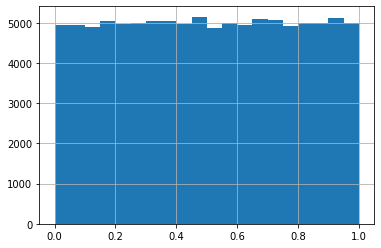

In [8]:
n_draws = 100000
prior = pd.Series(stats.uniform(0,1).rvs(n_draws))
prior.hist(bins=20)

Now it's time to observe some data and see how this affects our estimates. Suppose on the first day, 50 people visited our site and 10 of them made a purchase. We are going to record the number of purchases in a variable called observed.

In [9]:
observed = 10

Ware also going to create a generative model that will randomly draw from our prior uniform distribution, simulate 50 people coming to our website a large number of time, and see how many times we get a result that is in line with the result we have observed. To do this in Python, we are going to define a generative_model function that accepts a random probability parameter from our prior and then performs 50 binomial draws using that probability.

In [46]:
def generative_model(param):
    result = stats.binom(50, param).rvs()
    return result

In [47]:
def generative_model(param):
    result = np.random.binomial(50, param)
    return result

We are going to create a empty list that is going to contain our simulated results (sim_data) and then populate it by appending the results when each value in our prior distribution is plugged into our generative model.

In [13]:
sim_data = prior.apply(lambda p: generative_model(p))

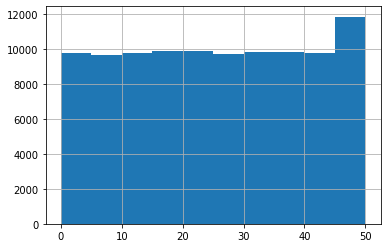

In [14]:
sim_data.hist()

Finally, we are going to arrive at our posterior distribution by selecting only the values from our prior distribution that generated instances where the simulated result matched our observed result of 10 purchases.

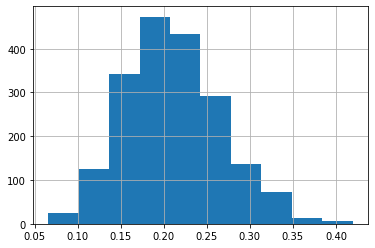

In [15]:
posterior = prior[sim_data == 10]
posterior.hist()

We can see just by looking at this that the updated probability of someone making a purchase from our online store is likely between 10% and 30% and most likely somewhere between 17% and 20%.

We can also calculate some statistics for our posterior distribution in addition to visualizing it. This will show us the mean, range, and standard deviation of our posterior distribution in addition to the quartiles.

In [16]:
posterior.describe()

count    1921.000000
mean        0.210910
std         0.055482
min         0.065879
25%         0.170587
50%         0.207154
75%         0.245691
max         0.419488
dtype: float64

We can see that both the mean and the median are approximately 21%. If we wanted to, we could also calculate a 90% credible interval for this distribution as follows.

In [17]:
print(posterior.quantile(.025), '|', posterior.quantile(.975))

0.11582320031929594 | 0.3291318913762762


# Maximum Likelihood Estimate.

MLE is the technique which helps us in determining the parameters of the distribution that best describe the given data.
- Podemos tomar la media y la varianza de la muestra, pero estamos seguro de que mi distribución tendrá esos valores? Sabemos que no podemos afirmarlo. MLE, nos ayuda a encontrar unos parámetros más "fiables" en estos casos.
- MLE can be defined as a method for estimating population parameters (such as the mean and variance for Normal, rate (lambda) for Poisson, etc.) from sample data such that the probability (likelihood) of obtaining the observed data is maximized.

In [18]:
rounded = posterior.round(2)
mode = rounded.mode()[0]
probability = list(rounded).count(mode)/len(rounded)
print('Maximum Likelihood Estimate: ', mode, '|',probability)

Maximum Likelihood Estimate:  0.2 | 0.07964601769911504


This tells us that given the data we have thus far, it is most likely that 19% of the visitors to our online store will make a purchase.

# Using pyMC3

In [22]:
import pymc3 as pm

#set constants
p_true = 0.05  # remember, this is unknown.
N = 1500

# sample N Bernoulli random variables from Ber(0.05).
# each random variable has a 0.05 chance of being a 1.
# this is the data-generation step
occurrences = stats.bernoulli.rvs(p_true, size=N)

print(occurrences) # Remember: Python treats True == 1, and False == 0
print(np.sum(occurrences))

[0 0 0 ... 0 0 0]
66


In [23]:
#include the observations, which are Bernoulli
with pm.Model() as model:
    p = pm.Uniform('p', lower=0, upper=1)
    obs = pm.Bernoulli("obs", p, observed=occurrences)
    # To be explained in chapter 3
    step = pm.Metropolis()
    trace = pm.sample(18000, step=step)
    burned_trace = trace[1000:]

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [p]
Sampling 4 chains, 0 divergences: 100%|██████████| 74000/74000 [00:05<00:00, 13340.67draws/s]
The number of effective samples is smaller than 25% for some parameters.


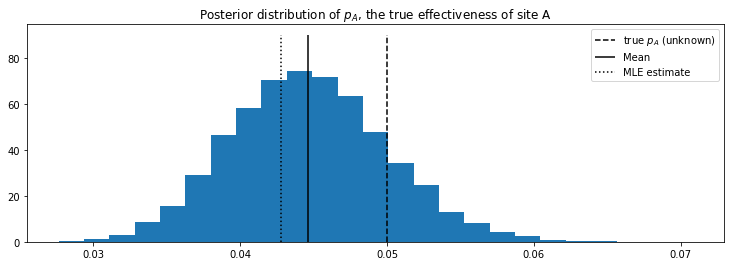

In [24]:
plt.figure(figsize=(12.5, 4))
plt.title("Posterior distribution of $p_A$, the true effectiveness of site A")
p_mean = burned_trace['p'].mean()
p_mle = stats.mode(burned_trace['p']).mode[0]
plt.vlines(p_true, 0, 90, linestyle="--", label="true $p_A$ (unknown)")
plt.vlines(p_mean, 0, 90, label="Mean")
plt.vlines(p_mle, 0, 90, linestyle="dotted", label="MLE estimate")
plt.hist(burned_trace["p"], bins=25, histtype="stepfilled", density=True)
plt.legend();

# Another example

In [25]:
import numpy as np
np.set_printoptions(threshold=100)# Generating 2,000 readers' reponse. 

# Assuming the claps follow a Bernoulli process - a sequence of binary (success/failure) random variables.
# 1 means clap. 0 means no clap.
# We pick the success rate of 30%.
clap_prob = 0.3

# IID (independent and identically distributed) assumption
clap_data = np.random.binomial(n=1, p=clap_prob, size=2000)

Step 1. [Prior] Choose a PDF to model your parameter θ, aka the prior distribution P(θ). This is your best guess about parameters before seeing the data X.

In [26]:
import scipy.stats as stats
import matplotlib.pyplot as plt

a = 400
b = 2000 - a

# domain θ
theta_range = np.linspace(0, 1, 1000)# prior P(θ)
prior = stats.beta.pdf(x = theta_range, a=a, b=b)

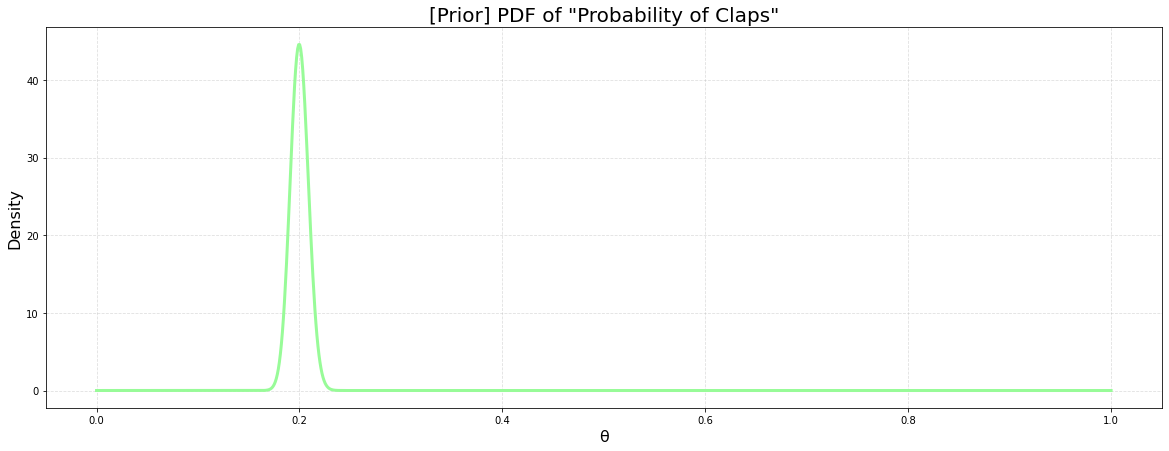

In [27]:
# Plotting the prior distribution
plt.rcParams['figure.figsize'] = [20, 7]
fig, ax = plt.subplots()
plt.plot(theta_range, prior, linewidth=3, color='palegreen')# Add a title
plt.title('[Prior] PDF of "Probability of Claps"', fontsize=20)# Add X and y Label
plt.xlabel('θ', fontsize=16)
plt.ylabel('Density', fontsize=16)# Add a grid
plt.grid(alpha=.4, linestyle='--')# Show the plot
plt.show()

Step 2. [Likelihood] Choose a PDF for P(X|θ). Basically you are modeling how the data X will look like given the parameter θ.



Step 2. Likelihood P(X|θ)

Choose a probability model for P(X|θ), the probability of seeing the data X given a particular parameter θ. Likelihood is also called a sampling distribution. To me, the term “sampling distribution” is much more intuitive than “likelihood”.

In [28]:
# The sampling dist P(X|θ) with a given clap_prob(θ)

likelihood = stats.binom.pmf(k = np.sum(clap_data), n = len(clap_data), p = clap_prob)

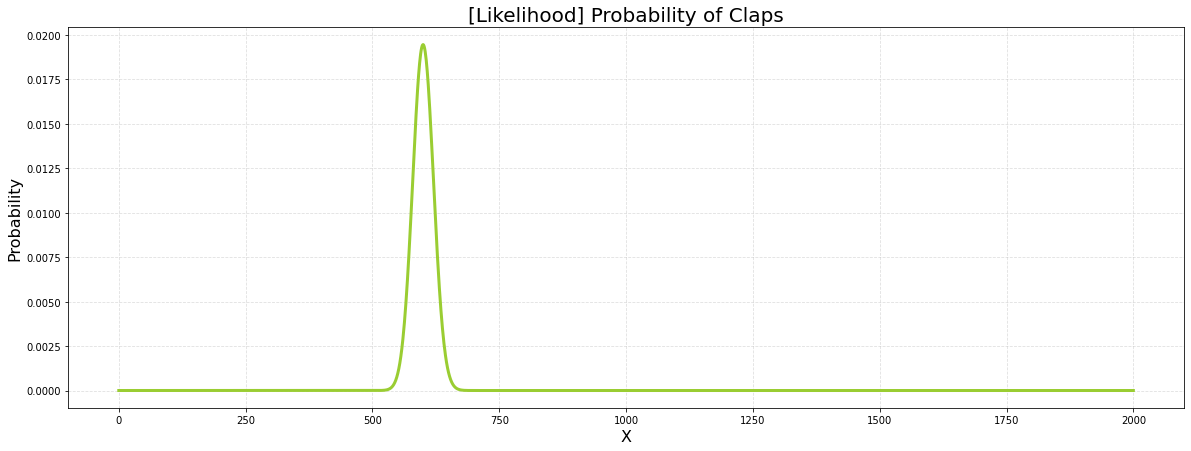

In [29]:
# Domain (# of claps)
X = np.arange(0, len(clap_data)+1)# Likelihood P(X|θ) for all X's
likelihood = stats.binom.pmf(k = X, n = len(clap_data), p = clap_prob)# Create the plot
fig, ax = plt.subplots()
plt.plot(X, likelihood, linewidth=3, color='yellowgreen')# Add a title
plt.title('[Likelihood] Probability of Claps' , fontsize=20)# Add X and y Label
plt.xlabel('X', fontsize=16)
plt.ylabel('Probability', fontsize=16)# Add a grid
plt.grid(alpha=.4, linestyle='--')# Show the plot
plt.show()

Step 3. [Posterior] Calculate the posterior distribution P(θ|X) and pick the θ that has the highest P(θ|X).

In [30]:
theta_range_e = theta_range + 0.001 
prior = stats.beta.cdf(x = theta_range_e, a=a, b=b) - stats.beta.cdf(x = theta_range, a=a, b=b) 
# prior = stats.beta.pdf(x = theta_range, a=a, b=b)

likelihood = stats.binom.pmf(k = np.sum(clap_data), n = len(clap_data), p = theta_range) 

posterior = likelihood * prior 
normalized_posterior = posterior / np.sum(posterior)

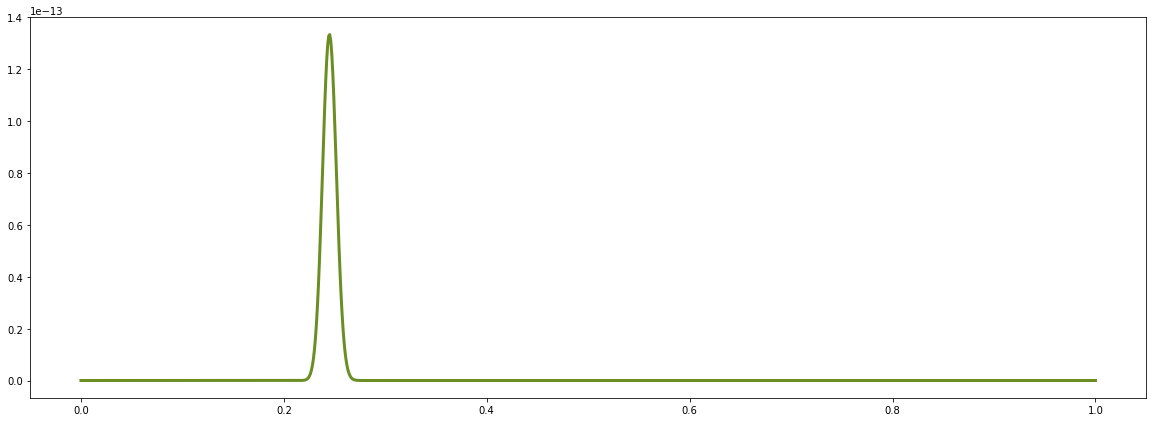

In [31]:
plt.plot(theta_range, posterior, label='Posterior', linewidth=3, color='olivedrab')

In [32]:
m_true = 2
n = 100
sim_data = stats.poisson(m_true).rvs(n)

In [33]:
sim_data[:10]

array([2, 2, 3, 3, 1, 3, 1, 4, 3, 3])

In [34]:
sim_data.mean()

2.05

(array([15., 22.,  0., 25.,  0., 25.,  9.,  0.,  2.,  2.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

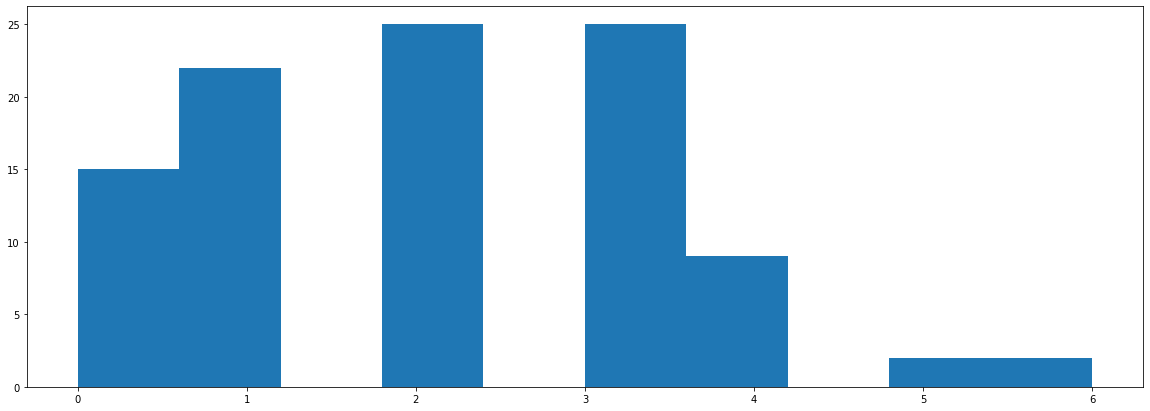

In [35]:
plt.hist(sim_data)

Let us consider a gamma prior distribution for the parameter λ∼Γ(a,b). 

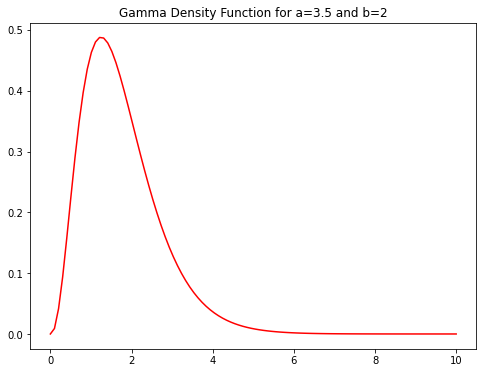

In [36]:
# Parameters of the prior gamma distribution.
a = 3.5 # shape
b = 2   # rate = 1/scale

x = np.linspace(start=0, stop=10, num=100)

plt.figure(figsize=(8, 6))
plt.plot(x, stats.gamma.pdf(x,a=a,scale=1/b), 'r-')
plt.title('Gamma Density Function for a={} and b={}'.format(a,b))

# Define the prior distribution.
prior = lambda x: stats.gamma.pdf(x, a=a, scale=1/b)

In [37]:
import scipy.special as sp

# Define the likelihood function.
def likelihood(lam,y):
    
    factorials = np.apply_along_axis(
        lambda x: sp.gamma(x+1),
        axis=0,
        arr=y
    )
    
    numerator = np.exp(-lam*y.size)*(lam**y.sum())
    
    denominator = np.multiply.reduce(factorials)
    
    return numerator/denominator  

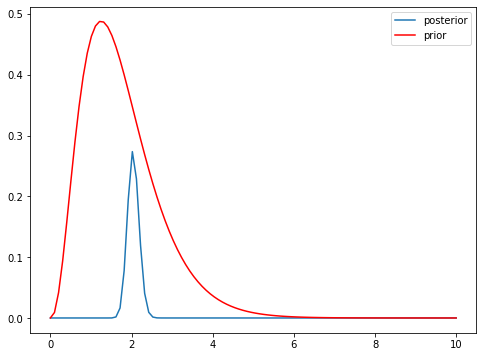

In [38]:
# Define the posterior distribution.
# (up to a constant)
def posterior_up_to_constant(lam,y):
    return likelihood(lam,y)*prior(lam)

# Plot of the prior and (scaled) posterior distribution
# for the parameter lambda.
#
# We multiply the posterior distrubution function
# by the amplitude factor 2.5e74 to make it comparable
# with the prior gamma distribution.
plt.figure(figsize=(8, 6))
plt.plot(x, 2.0e74*posterior_up_to_constant(x,sim_data), label='posterior')
plt.plot(x, stats.gamma.pdf(x,a=a,scale=1/b), 'r-', label='prior')
plt.legend();

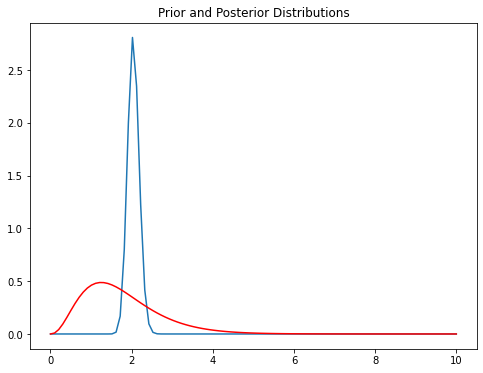

In [39]:
def posterior(lam,y):
    
    shape = a + y.sum()
    rate = b + y.size
    
    return stats.gamma.pdf(lam, shape, scale=1/rate)

plt.figure(figsize=(8, 6))
plt.plot(x, posterior(x,sim_data))
plt.plot(x, stats.gamma.pdf(x,a=a,scale=1/b), 'r-')
plt.title('Prior and Posterior Distributions');

In [40]:
# Posterior gamma parameters.
shape = a + sim_data.sum()
rate = b + sim_data.size

# Posterior mean.
shape/rate

2.0441176470588234

In [41]:
import pymc3 as pm

model = pm.Model()

with model:
    
    # Define the prior of the parameter lambda.
    lam = pm.Gamma('lambda', alpha=a, beta=b)
    
    # Define the likelihood function.
    y_obs = pm.Poisson('y_obs', mu=lam, observed=sim_data)
    
    # Consider 2000 draws and 3 chains.
    trace = pm.sample(draws=2000, chains=3)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [lambda]
Sampling 3 chains, 0 divergences: 100%|██████████| 7500/7500 [00:01<00:00, 6430.97draws/s]
The acceptance probability does not match the target. It is 0.88782210615924, but should be close to 0.8. Try to increase the number of tuning steps.


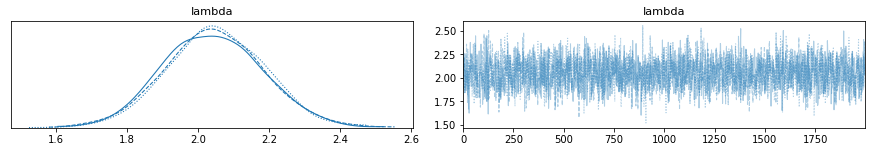

In [42]:
pm.traceplot(trace);

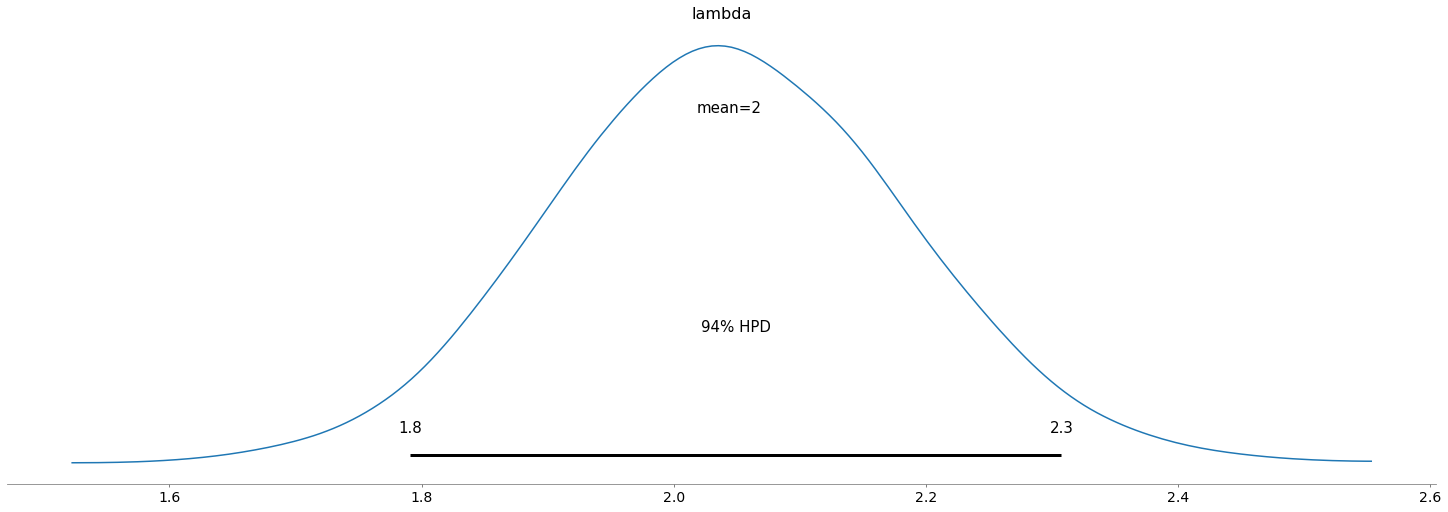

In [43]:
pm.plot_posterior(trace);

In [45]:
trace.get_values

<bound method MultiTrace.get_values of <MultiTrace: 3 chains, 2000 iterations, 2 variables>>